## Boston AirBNB Data Set

Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. [1]

Airbnb is used by millions of host and travelers to list their space and book accommodations anywhere in the world.

The Boston AirBNB data set was donwloaded from Inside Airbnb site which is an independent, non-commercial set of tools and data that allows you to explore how Airbnb is really being used in cities around the world.

By analyzing publicly available information about a city's Airbnb's listings, Inside Airbnb provides filters and key metrics so you can see how Airbnb is being used to compete with the residential housing market. [2]

[1] Airbnb, (2021, July 20). In Wikipedia. https://en.wikipedia.org/wiki/Airbnb

[2] Inside Airbnb. Adding data to the debate. (2021, July 21). Inside Airbnb. http://insideairbnb.com/about.html


This analysis will follow the Cross-Industry Standard Process for Data Mining (CRISP-DM) methodology, so after talking about what AirBnb is and what is its business model I will continue with the steps needed to understand the data, prepare it, deal with missing data and transform categorical variables when needed in order to answer the following questions and also create a model to predict the price of a listing.

<mark>The aim of the below data analysis is to understand the following:</mark>

1. How is price impacting the occupancy of Apartments during the year?
1. Is the price the only factor to choose one apartment between the other?  
1. Do the physical location of the property has an impact on the occupancy of the property?
1. What makes an Aparment more busy that others?


## Data Understanding

The Boston Airbnb data set consist of three different comma separated value files:
- listings.csv, including full descriptions and average review score
- reviews.csv, including unique id for each reviewer and detailed comments
- calendar.csv, including listing id and the price and availability for that day

The following cells will read, explore and prepare the data for the analysis. I will ensure the correct data types for the date and price columns and identify if is there null values that require attention.
In summary for each data set the following steps will be completed:

1. Read the data
1. Check total number of rows and columns
1. Check data types and ensure date and price are correct
1. Check for null values and take a descision to deal with them

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
# format float numbers
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 200

<h3 style='color:#00fe0f;'>Calendar data set</h3>

In [2]:
# Read the data
calendar = pd.read_csv('./data/calendar.csv')
calendar.head(2)

listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN

In [3]:
# Check total number of rows and columns
print(f'Total rows: {calendar.shape[0]: 14,.0f}\nTocal columns: {calendar.shape[1]: 11,.0f}')

Total rows:      1,308,890
Tocal columns:           4


In [4]:
# Check data types and ensure date and price are correct
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [5]:
# convert date to date time
calendar['date'] = pd.to_datetime(calendar['date'])

In [6]:
# clean unwanted symbols, $, and ',' from price column
calendar['price'] = calendar['price'].apply(lambda s: s.replace('$', '').replace(',','') if pd.notnull(s) else s)
# convert price to numeric values
calendar['price'] = pd.to_numeric(calendar['price'])
calendar[~calendar['price'].isna()].head(2)

listing_id       date available  price
365     3075044 2017-08-22         t  65.00
366     3075044 2017-08-21         t  65.00

In [7]:
# Check for null values
calendar.isna().mean()

listing_id   0.00
date         0.00
available    0.00
price        0.51
dtype: float64

In [8]:
# check if price is associated with the values in the available column
calendar.groupby('available').agg({'price':'mean'}).fillna(0)

price
available       
f           0.00
t         198.44

<p>As it can be seem, only the price column contains nulls, and they account for the 51% of the values.</p>
<p>Exploring the pricess vs the vslues in the available colunm, it seems that when the listing is not available, </p>
<p>it does not have a price so it will be safe to replace the nulls with zeros.</p>

In [9]:
# null prices can be filled with zero
calendar['price'].fillna(0, inplace=True)

<h3 style='color:#00fe0f;'>Reviews data set</h3>

In [10]:
# Read the data
reviews = pd.read_csv('./data/reviews.csv')
reviews.head(2)

listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   

                                            comments  
0  My stay at islam's place was really cool! Good...  
1  Great location for both airport and city - gre...

In [11]:
# Check total number of rows and columns
print(f'Total rows: {reviews.shape[0]: 14,.0f}\nTocal columns: {reviews.shape[1]: 11,.0f}')

Total rows:         68,275
Tocal columns:           6


In [12]:
# Check data types and ensure date is correct
reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [13]:
# convert date to date time
reviews['date'] = pd.to_datetime(reviews['date'])

In [14]:
# Check for null values
reviews.isna().mean()

listing_id      0.00
id              0.00
date            0.00
reviewer_id     0.00
reviewer_name   0.00
comments        0.00
dtype: float64

<h3 style='color:#00fe0f;'>Listings data set</h3>

In [15]:
# Read the data
listings = pd.read_csv('./data/listings.csv')
listings.head(1)

id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   

  last_scraped                        name  \
0   2016-09-07  Sunny Bungalow in the City   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   

                                               space  \
0  The house has an open and cozy feel at the sam...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   

                               neighborhood_overview notes  \
0  Roslindale is quiet, convenient and friendly. ...   NaN   

                                             transit  \
0  The bus stop is 2 blocks away, and frequent. B...   

                                              access interaction  \
0  You will have access to 2 bedrooms, a living r...         NaN   

                                         house_rules  \
0  Clean up and treat the home the way you'd like...   

                                       thumbnail_url  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...   

                                          medium_url  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...   

                                         picture_url  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...   

                                      xl_picture_url   host_id  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...  31303940   

                                     host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/31303940  Virginia  2015-04-15   

                          host_location  \
0  Boston, Massachusetts, United States   

                                          host_about host_response_time  \
0  We are country and city connecting in our deck...                NaN   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                NaN                  NaN                 f   

                                  host_thumbnail_url  \
0  https://a2.muscache.com/im/pictures/5936fef0-b...   

                                    host_picture_url host_neighbourhood  \
0  https://a2.muscache.com/im/pictures/5936fef0-b...         Roslindale   

   host_listings_count  host_total_listings_count  \
0                    1                          1   

                          host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'facebook', 'reviews']                    t   

  host_identity_verified                                         street  \
0                      f  Birch Street, Boston, MA 02131, United States   

  neighbourhood neighbourhood_cleansed  neighbourhood_group_cleansed    city  \
0    Roslindale             Roslindale                           NaN  Boston   

  state zipcode  market smart_location country_code        country  latitude  \
0    MA   02131  Boston     Boston, MA           US  United States     42.28   

   longitude is_location_exact property_type        room_type  accommodates  \
0     -71.13                 t         House  Entire home/apt             4   

   bathrooms  bedrooms  beds  bed_type  \
0       1.50      2.00  3.00  Real Bed   

                                           amenities  square_feet    price  \
0  {TV,"Wireless Internet",Kitchen,"Free Parking ...          NaN  $250.00   

  weekly_price monthly_price security_deposit cleaning_fee  guests_included  \
0          NaN           NaN              NaN       $35.00                1   

  extra_people  minimum_nights  maximum_nights calendar_updated  \
0        $0.00               2            1125      2 weeks ago   

   has_availability  availability_30  availability_60  availability_90  \
0               NaN                0                0                0   

   availability_365 calendar_last_scraped  number_of_reviews first_review  \
0                 0     

In [16]:
# Check total number of rows and columns
print(f'Total rows: {listings.shape[0]: 14,.0f}\nTocal columns: {listings.shape[1]: 11,.0f}')

Total rows:          3,585
Tocal columns:          95


In [17]:
# Check data types and ensure date is correct
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 95, dtype: object

In [18]:
# due to the number of columns it is not easy to see what are the ones with price and date so search for them
listings.columns[listings.columns.str.contains('price', regex=True)]

Index(['price', 'weekly_price', 'monthly_price'], dtype='object')

In [19]:
# clean unwanted symbols, $, and ',' from price column
listings['price'] = listings['price'].apply(lambda s: s.replace('$', '').replace(',','') if pd.notnull(s) else s)
# convert price to numeric values
listings['price'] = pd.to_numeric(listings['price'])
listings['price'].head(2)

0   250.00
1    65.00
Name: price, dtype: float64

In [20]:
print(f"Date between {calendar['date'].min().date()} and {calendar['date'].max().date()}")

Date between 2016-09-06 and 2017-09-05


There is no date column in this data set, but a last scraped column with the date when the data was optained. Lest convert it.

In [21]:
# convert date to date time
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'])

In [22]:
# Check for null values, given the amount of columns, filter only the ones with nulls
cols_with_nulls = listings.columns[(listings.isna().sum()>0).values]
listings[cols_with_nulls].isna().sum().sort_values(ascending=False)

jurisdiction_names              3585
license                         3585
neighbourhood_group_cleansed    3585
has_availability                3585
square_feet                     3529
monthly_price                   2697
weekly_price                    2693
security_deposit                2243
notes                           1975
interaction                     1554
access                          1489
neighborhood_overview           1415
host_about                      1309
transit                         1290
house_rules                     1192
cleaning_fee                    1107
space                           1057
review_scores_accuracy           823
review_scores_location           822
review_scores_value              821
review_scores_checkin            820
review_scores_communication      818
review_scores_cleanliness        818
review_scores_rating             813
first_review                     756
last_review                      756
reviews_per_month                756
x

From the above columns, only bathrooms, bedrooms, beds, property_type and City will be filled because they may will be used for the prediction of the price.

In [23]:
# fill null values for bathrooms
listings.query('bathrooms != bathrooms')[['id', 'property_type', 'bathrooms']].head()

id    property_type  bathrooms
103    777903            House        NaN
630    822063        Apartment        NaN
755   1426754        Apartment        NaN
800    276450        Apartment        NaN
820  12627225  Bed & Breakfast        NaN

In [24]:
# listings.groupby(['property_type', 'bathrooms']).agg({'id':'count'}).unstack().fillna(0)

In [25]:
# I will fill the missing bathrooms with the mode of each property type
house_bath_mode = listings.query("property_type == 'House'")['bathrooms'].mode().values[0]
apartment_bath_mode = listings.query("property_type == 'Apartment'")['bathrooms'].mode().values[0]
bet_bath_mode = listings.query("property_type == 'Bed & Breakfast'")['bathrooms'].mode().values[0]

print(house_bath_mode, apartment_bath_mode, bet_bath_mode)


1.0 1.0 1.0


In [26]:
listings.at[listings.query("property_type == 'House' and bathrooms != bathrooms").index, 'bathrooms'] = house_bath_mode
listings.at[listings.query("property_type == 'Apartment' and bathrooms != bathrooms").index, 'bathrooms'] = apartment_bath_mode
listings.at[listings.query("property_type == 'Bed & Breakfast' and bathrooms != bathrooms").index, 'bathrooms'] = bet_bath_mode

In [27]:
# fill null values for bedrooms
listings.query('bedrooms != bedrooms')[['id', 'property_type', 'bedrooms']].head()

id property_type  bedrooms
918   1077105     Apartment       NaN
920      9765     Apartment       NaN
924   1044307     Apartment       NaN
1095  1119740     Apartment       NaN
1117  1071144     Apartment       NaN

In [28]:
apart_bed_mode = listings.query("property_type == 'House'")['bedrooms'].mode().values[0]
apart_bed_mode

1.0

In [29]:
listings.at[listings.query("property_type == 'Apartment' and bedrooms != bedrooms").index, 'bedrooms'] = apart_bed_mode

In [30]:
# fill null values for beds
listings.query('beds != beds')[['id', 'property_type', 'beds']].head()

id    property_type  beds
494  14336348        Apartment   NaN
755   1426754        Apartment   NaN
820  12627225  Bed & Breakfast   NaN
825  12857811            House   NaN
910  12796808        Apartment   NaN

In [31]:
# checking at the above i will fill the missing bathrooms with the mode of each property type
house_bed_mode = listings.query("property_type == 'House'")['beds'].mode().values[0]
apartment_bed_mode = listings.query("property_type == 'Apartment'")['beds'].mode().values[0]
bet_bed_mode = listings.query("property_type == 'Bed & Breakfast'")['beds'].mode().values[0]

print(house_bed_mode, apartment_bed_mode, bet_bed_mode)

1.0 1.0 1.0


In [32]:
# fill missing values
listings.at[listings.query("property_type == 'House' and beds != beds").index, 'beds'] = house_bed_mode
listings.at[listings.query("property_type == 'Apartment' and beds != beds").index, 'beds'] = apartment_bed_mode
listings.at[listings.query("property_type == 'Bed & Breakfast' and beds != beds").index, 'beds'] = bet_bed_mode

In [33]:
# fill null values for property_type
listings.query('property_type != property_type')[['id', 'property_type','bathrooms', 'bedrooms', 'beds', 'price']]

id property_type  bathrooms  bedrooms  beds  price
1321   7731797           NaN       1.00      0.00  1.00 199.00
2061  14122467           NaN       1.00      1.00  1.00 190.00
3393     10758           NaN       1.00      1.00  1.00 115.00

In [34]:
# there is more difficult to assign a default value to the property type so in this case those records will be removed
listings = listings.query('property_type == property_type')

In [35]:
listings.shape

(3582, 95)

### Answer questions

In [36]:
# I will start looking at the number of listings for each type of property type to choose the one with 
# the more listings for the analysis.
property_types = listings.groupby('property_type').agg({'id':'count'}).reset_index()
property_types.columns = ['property_type', 'listings']
property_types['% listing'] = (property_types['listings'] / property_types['listings'].sum()) * 100
property_types = property_types.sort_values('% listing', ascending=False)

property_types

property_type  listings  % listing
0         Apartment      2612      72.92
8             House       562      15.69
4       Condominium       231       6.45
11        Townhouse        54       1.51
1   Bed & Breakfast        41       1.14
9              Loft        39       1.09
10            Other        17       0.47
2              Boat        12       0.34
12            Villa         6       0.17
6      Entire Floor         4       0.11
5              Dorm         2       0.06
3         Camper/RV         1       0.03
7        Guesthouse         1       0.03

#### 1. How is price impacting the occupancy of Apartments during the year?

In [37]:
# The analysis will be done only for aparments property type that was the property type with more listings,
# in case you use a different data set please adjust the property type value below if different
listings_apt = listings.query('property_type == "Apartment"')
apt_id = list(listings_apt['id'].unique())
calendar_apt = calendar.query('listing_id == @apt_id')
del apt_id

In [38]:
# lest see the monthly occupancy of apartments
monthly_occupancy = calendar_apt.groupby([pd.Grouper(key='date', freq='1M'), 'available'])\
    .agg({'listing_id':'count'}).unstack().fillna(0).reset_index()

monthly_occupancy.columns = ['date'] + ['busy' if c[1]=='f' else 'available' for c in monthly_occupancy.columns[1:]]

monthly_occupancy['total'] = monthly_occupancy['busy'] + monthly_occupancy['available']

monthly_occupancy['% busy'] = (monthly_occupancy['busy'] / monthly_occupancy['total'])

monthly_occupancy.head()

date   busy  available  total  % busy
0 2016-09-30  47652      17673  65325    0.73
1 2016-10-31  47771      33232  81003    0.59
2 2016-11-30  35988      42402  78390    0.46
3 2016-12-31  37278      43725  81003    0.46
4 2017-01-31  36206      44797  81003    0.45

In [39]:
# lest see how prices vary during the year for all listings
monthly_price = calendar_apt.groupby([pd.Grouper(key='date', freq='1M')]).agg({'price':'mean'}).reset_index()
monthly_price.columns = ['date', 'price']

monthly_price.head()


date  price
0 2016-09-30  77.34
1 2016-10-31 106.93
2 2016-11-30 120.16
3 2016-12-31 111.42
4 2017-01-31 107.54

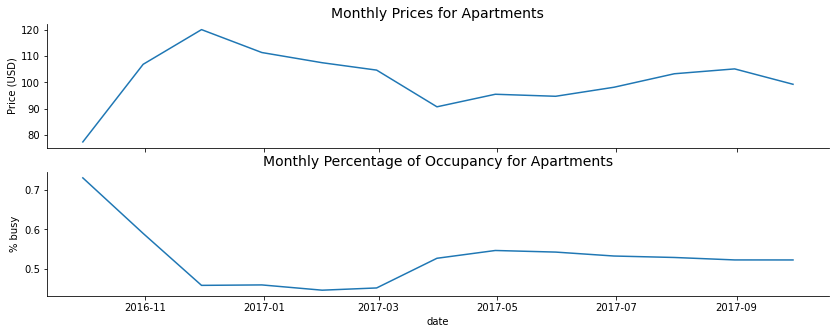

In [40]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14, 5), sharex=True, sharey=False)

g = sns.lineplot(data=monthly_price, x='date', y='price', ax=ax1)
g1 = sns.lineplot(data=monthly_occupancy, x='date', y='% busy', ax=ax2)

_ = g.set_title('Monthly Prices for Apartments', fontsize=14)
_ = g1.set_title('Monthly Percentage of Occupancy for Apartments', fontsize=14)
_ = g.set_ylabel('Price (USD)')

sns.despine()

### 2. Is the price the only factor to choose one apartment between the other? 


In [41]:
apt_avl = calendar_apt.groupby(['listing_id','available']).agg({'date':lambda s: s.shape[0]}).unstack().fillna(0).reset_index()
apt_avl.columns = ['listing_id'] + ['busy' if c[1]=='f' else 'available' for c in apt_avl.columns[1:] ]
apt_avl['% busy'] = apt_avl['busy'] / (apt_avl['busy'] + apt_avl['available'])
apt_avl.head()

listing_id   busy  available  % busy
0        3353 116.00     249.00    0.32
1        6695  41.00     324.00    0.11
2        6976  46.00     319.00    0.13
3        8792 117.00     248.00    0.32
4        9273   1.00     364.00    0.00

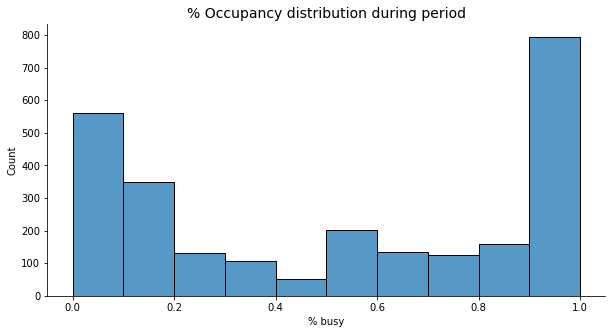

In [42]:
# Plot a histogram of the percentages of occupancy, use a bucket size of 10%
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.histplot(data=apt_avl, x='% busy', binwidth=.10, ax=ax)
g.set_title('% Occupancy distribution during period', fontsize=14);
sns.despine()

You can see there are two peaks, the first one shows listings busy less than 10% of the time, and the second peak shows listings busy more that 90% of the time.

Les't look at the average price of those two groups to see if that is the main reason of the occupancy.

In [43]:
# average price of apartments busy less than 25% of the time and more than 75% of the time
listings_busy_10 = list(apt_avl.query("`% busy` <= .10")['listing_id'])
listings_busy_90 = list(apt_avl.query("`% busy` > .90")['listing_id'])

In [44]:
price_busy_10 = listings_apt.query("id == @listings_busy_10")['price']
price_busy_10[(price_busy_10<price_busy_10.quantile(.95))].mean()


175.34586466165413

In [45]:
price_busy_90 = listings_apt.query("id == @listings_busy_90")['price']
price_busy_90[(price_busy_90<price_busy_90.quantile(.95))].mean()


138.9880319148936

Clearly the mean prices of those two groups are different, having the one with the greater occupancy being lower.

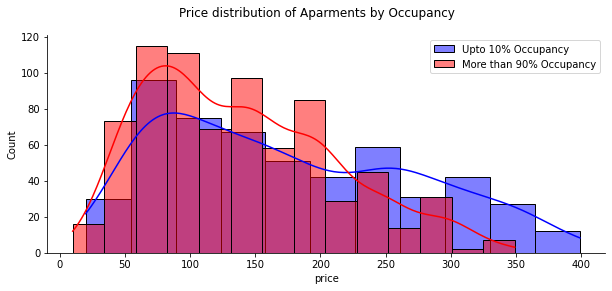

In [46]:

fig, ax = plt.subplots(figsize=(10,4), sharex=True, sharey=True)
fig.suptitle('Price distribution of Aparments by Occupancy')

g1 = sns.histplot(x=price_busy_10[price_busy_10<price_busy_10.quantile(.95)], ax=ax, kde=True, 
        element='bars', color='blue', label='Upto 10% Occupancy')
g2 = sns.histplot(x=price_busy_90[price_busy_90<price_busy_90.quantile(.95)], ax=ax, kde=True, 
        element='bars', color='red', label='More than 90% Occupancy')
plt.legend()
sns.despine()

You can see that there are apartments with the same price in all the buckets, so what made the user choose between them that ended up on one apartment being used more often that the other. It seems that beside the price there must be something else.
We need to find out what it is.

### 3. Do the physical location of the property has an impact on the occupancy of the property?

Les't see if the physical location beside the price, could be the factor that make a difference between apartments

In [47]:
apt_avl['group'] = 0

apt_avl.at[apt_avl['% busy']<=.10, 'group'] = 1
# apt_avl.at[(apt_avl['% busy']>.90) & (apt_avl['% busy']<=.5), 'group'] = 2
# apt_avl.at[(apt_avl['% busy']>.5) & (apt_avl['% busy']<=.75), 'group'] = 3
apt_avl.at[apt_avl['% busy']>.90, 'group'] = 2

apt_avl['group'].value_counts()




0    1258
2     794
1     560
Name: group, dtype: int64

In [48]:
apt_avl = apt_avl.merge(listings[['id', 'longitude', 'latitude']], left_on='listing_id',
    right_on='id', how='left')

apt_avl.head()

listing_id   busy  available  % busy  group    id  longitude  latitude
0        3353 116.00     249.00    0.32      0  3353     -71.13     42.36
1        6695  41.00     324.00    0.11      0  6695     -71.09     42.33
2        6976  46.00     319.00    0.13      0  6976     -71.14     42.29
3        8792 117.00     248.00    0.32      0  8792     -71.06     42.36
4        9273   1.00     364.00    0.00      1  9273     -71.03     42.36

In [49]:
import folium

In [96]:
f = folium.Figure(width=500, height=500)

my_map=folium.Map(location = [42.320,-71.05], #Initiate map on Boston city
                  zoom_start = 11,
                  min_zoom = 11
).add_to(f)

In [97]:
for i, r in apt_avl.iterrows():
    if r['group'] == 1:
        color = 'red'
    elif r['group'] == 2:
        color = 'green'
    else:
        color = 'black'

    folium.Circle(
        [r['latitude'], r['longitude'] ],
        fill=True,
        radius=2,
        color=color,
        
        ).add_to(my_map)


# for i, r in apt_avl.iterrows():
#     if r['labels'] == 0:
#         color = 'red'
#     elif r['labels'] == 1:
#         color = 'green'
#     else:
#         color = 'black'

#     folium.Circle(
#         [r['latitude'], r['longitude'] ],
#         fill=True,
#         radius=2,
#         color=color,
        
#         ).add_to(my_map)        

In [98]:
# show location of listings
# green means apartments with an occupancy rate of more than 90%
# red means apartments with an occupancy rate of less than 10%
# black means apartments with an occupancy rate between 10% and less than 90%
my_map

You can see there are no well defined clusters of listings of each color, there are a mix of colors a long the map which means that an apartment is choosend more ofthen than other no matter the location.


In [53]:
# TODO: what factors made that a listing is choosend more ofthen that the other


In [54]:
drop_columns = [
    'listing_url',
    'scrape_id',
    'last_scraped',
    'name',
    'summary',
    'space',
    'description',
    'experiences_offered',
    'neighborhood_overview',
    'notes',
    'transit',
    'access',
    'interaction',
    'house_rules',
    'thumbnail_url',
    'medium_url',
    'picture_url',
    'xl_picture_url',
    'host_id',
    'host_url',
    'host_name',
    'host_since',
    'host_location',
    'host_about',
    'host_response_time',
    'host_is_superhost',
    'host_thumbnail_url',
    'host_picture_url',
    'host_neighbourhood',
    'host_listings_count',
    'host_total_listings_count',
    'host_verifications',
    'host_has_profile_pic',
    'host_identity_verified',
    'street',
    'neighbourhood',
    'neighbourhood_cleansed',
    'neighbourhood_group_cleansed',
    'city',
    'state',
    'market',
    'smart_location',
    'country_code',
    'country',
    'is_location_exact',
    'property_type',
    'square_feet',
    'weekly_price',
    'monthly_price',
    'extra_people',
    'maximum_nights',
    'has_availability',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'calendar_updated',
    'calendar_last_scraped',
    'first_review',
    'last_review',
    'requires_license',
    'license',
    'jurisdiction_names',
    'instant_bookable',
    'require_guest_profile_picture',
    'require_guest_phone_verification',
    'calculated_host_listings_count',
    'reviews_per_month',
    'host_response_rate',
    'host_acceptance_rate',
    'zipcode',
    'price',
    'latitude',
    'longitude',
    'security_deposit',
    'cleaning_fee',
    'cancellation_policy',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'number_of_reviews',
]

In [55]:
listings_apt.drop(drop_columns, axis='columns', inplace=True)

In [56]:
listings_apt.head()

id        room_type  accommodates  bathrooms  bedrooms  beds  \
1    3075044     Private room             2       1.00      1.00  1.00   
2       6976     Private room             2       1.00      1.00  1.00   
6    5706985  Entire home/apt             3       1.00      1.00  2.00   
9     849408  Entire home/apt             5       1.00      2.00  2.00   
13  13547301  Entire home/apt             5       1.00      2.00  3.00   

    bed_type                                          amenities  \
1   Real Bed  {TV,Internet,"Wireless Internet","Air Conditio...   
2   Real Bed  {TV,"Cable TV","Wireless Internet","Air Condit...   
6   Real Bed  {TV,Internet,"Wireless Internet",Kitchen,"Free...   
9   Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...   
13  Real Bed  {TV,Internet,"Wireless Internet","Air Conditio...   

    guests_included  minimum_nights  
1                 0               2  
2                 1               3  
6                 1               1  
9                 4               4  
13                5               2

In [57]:
# # Fill with 0 the security deposit and cleaning fee, then convert to numeric
# listings_apt['security_deposit'].fillna('$0.00', inplace=True)
# listings_apt['cleaning_fee'].fillna('$0.00', inplace=True)

# listings_apt['security_deposit'] = listings_apt['security_deposit'].apply(lambda s: s.replace('$', '').replace(',',''))
# listings_apt['cleaning_fee'] = listings_apt['cleaning_fee'].apply(lambda s: s.replace('$', '').replace(',',''))

# listings_apt['security_deposit'] = pd.to_numeric(listings_apt['security_deposit'])
# listings_apt['cleaning_fee'] = pd.to_numeric(listings_apt['cleaning_fee'])

In [58]:
# # there are listings without ratings, assume max value for those
# listings_apt['review_scores_rating'].fillna(listings_apt['review_scores_rating'].max(), inplace=True)
# listings_apt['review_scores_accuracy'].fillna(listings_apt['review_scores_accuracy'].max(), inplace=True)
# listings_apt['review_scores_cleanliness'].fillna(listings_apt['review_scores_cleanliness'].max(), inplace=True)
# listings_apt['review_scores_checkin'].fillna(listings_apt['review_scores_checkin'].max(), inplace=True)
# listings_apt['review_scores_communication'].fillna(listings_apt['review_scores_communication'].max(), inplace=True)
# listings_apt['review_scores_location'].fillna(listings_apt['review_scores_location'].max(), inplace=True)
# listings_apt['review_scores_value'].fillna(listings_apt['review_scores_value'].max(), inplace=True)

In [59]:
listings_apt.dtypes

id                   int64
room_type           object
accommodates         int64
bathrooms          float64
bedrooms           float64
beds               float64
bed_type            object
amenities           object
guests_included      int64
minimum_nights       int64
dtype: object

In [60]:
# Work on categorical variables
listings_apt.select_dtypes(include=['object']).head()


room_type  bed_type  \
1      Private room  Real Bed   
2      Private room  Real Bed   
6   Entire home/apt  Real Bed   
9   Entire home/apt  Real Bed   
13  Entire home/apt  Real Bed   

                                            amenities  
1   {TV,Internet,"Wireless Internet","Air Conditio...  
2   {TV,"Cable TV","Wireless Internet","Air Condit...  
6   {TV,Internet,"Wireless Internet",Kitchen,"Free...  
9   {TV,"Cable TV",Internet,"Wireless Internet","A...  
13  {TV,Internet,"Wireless Internet","Air Conditio...

In [61]:
# identify categorical columns
catcols = listings_apt.select_dtypes(include=['object']).copy()
# remove amenities
catcols.drop('amenities', axis='columns', inplace=True)

catcols.head()

room_type  bed_type
1      Private room  Real Bed
2      Private room  Real Bed
6   Entire home/apt  Real Bed
9   Entire home/apt  Real Bed
13  Entire home/apt  Real Bed

In [62]:
catcols_name = catcols.columns
for col in catcols_name:
    catcols = pd.concat([catcols.drop(col, axis=1), pd.get_dummies(
        catcols[col],
        prefix=col,
        prefix_sep='_',
        drop_first=True,
        dummy_na=False
    )], axis=1)

In [63]:
catcols.head()

room_type_Private room  room_type_Shared room  bed_type_Couch  \
1                        1                      0               0   
2                        1                      0               0   
6                        0                      0               0   
9                        0                      0               0   
13                       0                      0               0   

    bed_type_Futon  bed_type_Pull-out Sofa  bed_type_Real Bed  
1                0                       0                  1  
2                0                       0                  1  
6                0                       0                  1  
9                0                       0                  1  
13               0                       0                  1

In [64]:
# remove categorical columns from listings_apt and add new dummy columns
listings_apt.drop(catcols_name, axis='columns', inplace=True)
listings_apt = pd.concat([listings_apt, catcols], axis='columns')

In [65]:
# extract amenities and convert to dummy columns
amenities = listings_apt[['amenities']].copy()
amenities.head()

amenities
1   {TV,Internet,"Wireless Internet","Air Conditio...
2   {TV,"Cable TV","Wireless Internet","Air Condit...
6   {TV,Internet,"Wireless Internet",Kitchen,"Free...
9   {TV,"Cable TV",Internet,"Wireless Internet","A...
13  {TV,Internet,"Wireless Internet","Air Conditio...

In [66]:
for i, r in tqdm(amenities.iterrows(), total=amenities.shape[0]):
    a = r['amenities'].split(',')
    for item in a:
        item = item.replace('"', '').replace("{","").replace("}","")
        if item not in amenities.columns:
            amenities[item] = None
            amenities.at[i, item] = 1
        else:
            amenities.at[i, item] = 1

    

100%|██████████| 2612/2612 [00:01<00:00, 1786.26it/s]


In [67]:
amenities.head()

amenities TV Internet  \
1   {TV,Internet,"Wireless Internet","Air Conditio...  1        1   
2   {TV,"Cable TV","Wireless Internet","Air Condit...  1     None   
6   {TV,Internet,"Wireless Internet",Kitchen,"Free...  1        1   
9   {TV,"Cable TV",Internet,"Wireless Internet","A...  1        1   
13  {TV,Internet,"Wireless Internet","Air Conditio...  1        1   

   Wireless Internet Air Conditioning Kitchen Pets Allowed  \
1                  1                1       1            1   
2                  1                1       1         None   
6                  1             None       1         None   
9                  1                1       1         None   
13                 1                1       1         None   

   Pets live on this property Dog(s) Heating Family/Kid Friendly Washer Dryer  \
1                           1      1       1                   1      1     1   
2                        None   None       1                None      1     1   
6                        None   None       1                None   None  None   
9                        None   None       1                   1      1     1   
13                       None   None       1                   1   None  None   

   Smoke Detector Carbon Monoxide Detector Fire Extinguisher Essentials  \
1               1                        1                 1          1   
2               1                        1              None          1   
6               1                        1                 1          1   
9               1                        1                 1          1   
13              1                        1                 1          1   

   Shampoo Lock on Bedroom Door Hangers Hair Dryer  Iron Cable TV  \
1        1                    1       1          1     1     None   
2        1                    1    None       None  None        1   
6        1                 None    None       None  None     None   
9        1                 None       1          1     1        1   
13       1                 None       1          1     1     None   

   Free Parking on Premises First Aid Kit Safety Card  \
1                      None          None        None   
2                         1             1           1   
6                         1             1        None   
9                         1             1        None   
13                        1             1           1   

   translation missing: en.hosting_amenity_49  \
1                                        None   
2                                           1   
6                                        None   
9                                        None   
13                                       None   

   translation missing: en.hosting_amenity_50 24-Hour Check-in  \
1                                        None             None   
2                                           1             None   
6                                        None                1   
9                                        None                1   
13                                       None                1   

   Laptop Friendly Workspace Breakfast Cat(s) Indoor Fireplace Washer / Dryer  \
1                       None      None   None             None           None   
2                       None      None   None             None           None   
6                       None      None   None             None           None   
9                          1      None   None             None           None   
13                         1      None   None             None           None   

   Smoking Allowed       Buzzer/Wireless Intercom Hot Tub Suitable for Events  \
1             None  None                     None    None                None   
2             None  None                     None    None                None   
6             None  None                     None    None                None   
9             None  None                     None    None

In [68]:
amenities.drop('amenities', axis='columns', inplace=True)

In [69]:
# fillna amenities dummy columns
for c in amenities.columns:
    amenities[c].fillna(0, inplace=True)

amenities.head(2)

TV  Internet  Wireless Internet  Air Conditioning  Kitchen  Pets Allowed  \
1   1         1                  1                 1        1             1   
2   1         0                  1                 1        1             0   

   Pets live on this property  Dog(s)  Heating  Family/Kid Friendly  Washer  \
1                           1       1        1                    1       1   
2                           0       0        1                    0       1   

   Dryer  Smoke Detector  Carbon Monoxide Detector  Fire Extinguisher  \
1      1               1                         1                  1   
2      1               1                         1                  0   

   Essentials  Shampoo  Lock on Bedroom Door  Hangers  Hair Dryer  Iron  \
1           1        1                     1        1           1     1   
2           1        1                     1        0           0     0   

   Cable TV  Free Parking on Premises  First Aid Kit  Safety Card  \
1         0                         0              0            0   
2         1                         1              1            1   

   translation missing: en.hosting_amenity_49  \
1                                           0   
2                                           1   

   translation missing: en.hosting_amenity_50  24-Hour Check-in  \
1                                           0                 0   
2                                           1                 0   

   Laptop Friendly Workspace  Breakfast  Cat(s)  Indoor Fireplace  \
1                          0          0       0                 0   
2                          0          0       0                 0   

   Washer / Dryer  Smoking Allowed     Buzzer/Wireless Intercom  Hot Tub  \
1               0                0  0                         0        0   
2               0                0  0                         0        0   

   Suitable for Events  Wheelchair Accessible  Gym  Elevator in Building  \
1                    0                      0    0                     0   
2                    0                      0    0                     0   

   Pool  Doorman  Paid Parking Off Premises  Free Parking on Street  \
1     0        0                          0                       0   
2     0        0                          0                       0   

   Other pet(s)  
1             0  
2             0

In [70]:
# remove uncommon amenities
avg_amenities = amenities.sum(axis='rows').mean()
amenities = amenities.iloc[:, (amenities.sum(axis='rows')>avg_amenities).values]
amenities.head()

TV  Internet  Wireless Internet  Air Conditioning  Kitchen  Heating  \
1    1         1                  1                 1        1        1   
2    1         0                  1                 1        1        1   
6    1         1                  1                 0        1        1   
9    1         1                  1                 1        1        1   
13   1         1                  1                 1        1        1   

    Family/Kid Friendly  Washer  Dryer  Smoke Detector  \
1                     1       1      1               1   
2                     0       1      1               1   
6                     0       0      0               1   
9                     1       1      1               1   
13                    1       0      0               1   

    Carbon Monoxide Detector  Fire Extinguisher  Essentials  Shampoo  Hangers  \
1                          1                  1           1        1        1   
2                          1                  0           1        1        0   
6                          1                  1           1        1        0   
9                          1                  1           1        1        1   
13                         1                  1           1        1        1   

    Hair Dryer  Iron  Cable TV  24-Hour Check-in  Laptop Friendly Workspace  
1            1     1         0                 0                          0  
2            0     0         1                 0                          0  
6            0     0         0                 1                          0  
9            1     1         1                 1                          1  
13           1     1         0                 1                          1

In [71]:
# drop amenties column from listings_apt and add dummy columns
listings_apt.drop('amenities', axis='columns', inplace=True)
listings_apt = pd.concat([listings_apt, amenities], axis='columns')
listings_apt.head()

id  accommodates  bathrooms  bedrooms  beds  guests_included  \
1    3075044             2       1.00      1.00  1.00                0   
2       6976             2       1.00      1.00  1.00                1   
6    5706985             3       1.00      1.00  2.00                1   
9     849408             5       1.00      2.00  2.00                4   
13  13547301             5       1.00      2.00  3.00                5   

    minimum_nights  room_type_Private room  room_type_Shared room  \
1                2                       1                      0   
2                3                       1                      0   
6                1                       0                      0   
9                4                       0                      0   
13               2                       0                      0   

    bed_type_Couch  bed_type_Futon  bed_type_Pull-out Sofa  bed_type_Real Bed  \
1                0               0                       0                  1   
2                0               0                       0                  1   
6                0               0                       0                  1   
9                0               0                       0                  1   
13               0               0                       0                  1   

    TV  Internet  Wireless Internet  Air Conditioning  Kitchen  Heating  \
1    1         1                  1                 1        1        1   
2    1         0                  1                 1        1        1   
6    1         1                  1                 0        1        1   
9    1         1                  1                 1        1        1   
13   1         1                  1                 1        1        1   

    Family/Kid Friendly  Washer  Dryer  Smoke Detector  \
1                     1       1      1               1   
2                     0       1      1               1   
6                     0       0      0               1   
9                     1       1      1               1   
13                    1       0      0               1   

    Carbon Monoxide Detector  Fire Extinguisher  Essentials  Shampoo  Hangers  \
1                          1                  1           1        1        1   
2                          1                  0           1        1        0   
6                          1                  1           1        1        0   
9                          1                  1           1        1        1   
13                         1                  1           1        1        1   

    Hair Dryer  Iron  Cable TV  24-Hour Check-in  Laptop Friendly Workspace  
1            1     1         0                 0                          0  
2            0     0         1                 0                          0  
6            0     0         0                 1                          0  
9            1     1         1                 1                          1  
13           1     1         0                 1                          1

In [72]:
listings_apt.dtypes

id                             int64
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
guests_included                int64
minimum_nights                 int64
room_type_Private room         uint8
room_type_Shared room          uint8
bed_type_Couch                 uint8
bed_type_Futon                 uint8
bed_type_Pull-out Sofa         uint8
bed_type_Real Bed              uint8
TV                             int64
Internet                       int64
Wireless Internet              int64
Air Conditioning               int64
Kitchen                        int64
Heating                        int64
Family/Kid Friendly            int64
Washer                         int64
Dryer                          int64
Smoke Detector                 int64
Carbon Monoxide Detector       int64
Fire Extinguisher              int64
Essentials                     int64
Shampoo                        int64
H

In [73]:
# # fillna amenities dummy columns
# dummy_columns = list(listings_apt.select_dtypes(include=['object']).columns)
# for c in dummy_columns:
#     listings_apt[c].fillna(0, inplace=True)

# listings_apt.head(2)

In [74]:
listings_apt.dtypes

id                             int64
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
guests_included                int64
minimum_nights                 int64
room_type_Private room         uint8
room_type_Shared room          uint8
bed_type_Couch                 uint8
bed_type_Futon                 uint8
bed_type_Pull-out Sofa         uint8
bed_type_Real Bed              uint8
TV                             int64
Internet                       int64
Wireless Internet              int64
Air Conditioning               int64
Kitchen                        int64
Heating                        int64
Family/Kid Friendly            int64
Washer                         int64
Dryer                          int64
Smoke Detector                 int64
Carbon Monoxide Detector       int64
Fire Extinguisher              int64
Essentials                     int64
Shampoo                        int64
H

### CLUSTERING

In clustering the values for all features must be transformed to the same scale. So we need to do feature scaling first


In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [76]:
# Scale all columns, except the listing id
scaler = StandardScaler()
scaled_features = scaler.fit_transform(listings_apt.iloc[:, 1:])

In [77]:
# Crete kmeans cluster object
kmeans = KMeans(
    init='random',
    n_clusters=2, # I want to have 10 groups to try to identify the borderline groups, poor occupancy or > 90% occupancy
    n_init=10, # default 10, number of times algorithm will be run with different centroids seeds.
    max_iter=300, # default 300, maximun number of iterations of the algorithm for a single run.
    random_state=42, # Use an int to make the randomness deterministic.
)

In [78]:
# run k-means algorithm on the scaled data
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=2, random_state=42)

In [79]:
# Final locations of the centroid
kmeans.cluster_centers_[:1]

array([[ 0.41550576,  0.20286707,  0.28876386,  0.32921724,  0.25503144,
        -0.04332703, -0.32160204, -0.10316457, -0.05183763, -0.06999096,
        -0.04880623,  0.12280651,  0.31032405,  0.25064906,  0.18766554,
         0.2357042 ,  0.11202342,  0.19056152,  0.32924219,  0.10827585,
         0.10272029,  0.20543701,  0.30381461,  0.20483038,  0.3780191 ,
         0.49326508,  0.63322184,  0.71858886,  0.76860057,  0.24124509,
         0.62416679,  0.58297333]])

In [80]:
# The number of iterations required to converge
kmeans.n_iter_

15

In [81]:
labels = kmeans.labels_

In [82]:
labels.shape

(2612,)

In [83]:
listings_apt.shape

(2612, 33)

In [88]:
apt_avl.shape

(2612, 42)

In [84]:
listings_apt['labels'] = labels

In [85]:
# add labels to apt_avl
apt_avl = apt_avl.merge(listings_apt, left_on='listing_id', right_on='id', how='left')

# apt_avl.drop(['id_x', 'id_y'], axis='columns', inplace=True)

apt_avl.head()

listing_id   busy  available  % busy  group  id_x  longitude  latitude  \
0        3353 116.00     249.00    0.32      0  3353     -71.13     42.36   
1        6695  41.00     324.00    0.11      0  6695     -71.09     42.33   
2        6976  46.00     319.00    0.13      0  6976     -71.14     42.29   
3        8792 117.00     248.00    0.32      0  8792     -71.06     42.36   
4        9273   1.00     364.00    0.00      1  9273     -71.03     42.36   

   id_y  accommodates  bathrooms  bedrooms  beds  guests_included  \
0  3353             1       1.00      1.00  1.00                1   
1  6695             4       1.00      1.00  2.00                2   
2  6976             2       1.00      1.00  1.00                1   
3  8792             3       1.00      1.00  1.00                0   
4  9273             4       2.00      2.00  2.00                4   

   minimum_nights  room_type_Private room  room_type_Shared room  \
0               7                       1                      0   
1               3                       0                      0   
2               3                       1                      0   
3              30                       0                      0   
4               3                       0                      0   

   bed_type_Couch  bed_type_Futon  bed_type_Pull-out Sofa  bed_type_Real Bed  \
0               0               0                       0                  1   
1               0               0                       0                  1   
2               0               0                       0                  1   
3               0               0                       0                  1   
4               0               0                       0                  1   

   TV  Internet  Wireless Internet  Air Conditioning  Kitchen  Heating  \
0   0         1                  1                 1        1        1   
1   1         1                  1                 1        1        1   
2   1         0                  1                 1        1        1   
3   1         1                  1                 1        1        1   
4   1         1                  1                 1        1        1   

   Family/Kid Friendly  Washer  Dryer  Smoke Detector  \
0                    0       1      1               1   
1                    0       1      1               1   
2                    0       1      1               1   
3                    0       0      0               0   
4                    0       1      1               0   

   Carbon Monoxide Detector  Fire Extinguisher  Essentials  Shampoo  Hangers  \
0                         0                  0           0        0        0   
1                         1                  0           1        1        1   
2                         1                  0           1        1        0   
3                         0                  0           0        0        0   
4                         0                  0           0        0        0   

   Hair Dryer  Iron  Cable TV  24-Hour Check-in  Laptop Friendly Workspace  \
0           0     0         0                 0                          0   
1           1     1         1                 1                          1   
2           0     0         1                 0                          0   
3           0     0         1                 0                          0   
4           0     0         1                 0                          0   

   labels  
0       1  
1       0  
2       1  
3       1  
4       1

In [95]:
apt_avl['labels'].value_counts()

1    1366
0    1246
Name: labels, dtype: int64

In [94]:
apt_avl.query('`% busy` <= .8')['labels'].value_counts()

0    866
1    800
Name: labels, dtype: int64

In [87]:
apt_avl.query('`% busy` > .9')['labels'].value_counts()

1    500
0    294
Name: labels, dtype: int64

In [85]:
listings.merge(apt_avl, left_on='id', right_on='listing_id', how='left').to_excel('listings_occupancy.xlsx', index=False)

In [88]:
apt_avl.to_excel('apt_occupancy.xlsx', index=False)

In [92]:
## HOW MANY CLUSTERS ELBOW METHOD

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }

# A list holds the SSE values for each k
sse = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

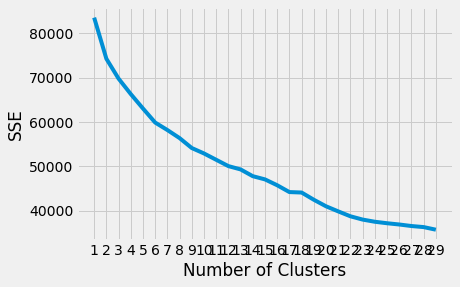

In [93]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 30), sse)
plt.xticks(range(1, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")


Text(0, 0.5, 'Silhouette Coefficient')

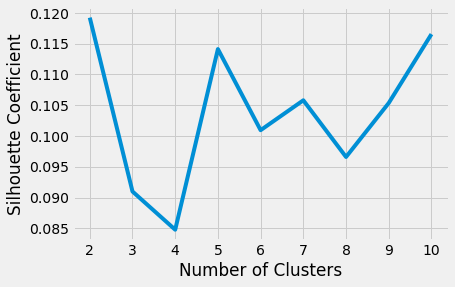

In [88]:
## HOW MANY CLUSTERS silhouette METHOD
# A list holds the silhouette coefficients for each k
from sklearn.metrics import silhouette_score

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }

silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)


plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")


In [48]:
# Based on the above compare their occupancy 
property_type_avl = calendar.query('property_type == @prts').groupby(['property_type', 'available']).agg({'listing_id':'count'}).unstack().fillna(0).reset_index()
property_type_avl.columns = ['property_type'] + ['busy' if c[1]=='f' else 'available' for c in property_type_avl.columns[1:]]
property_type_avl['total_days'] = property_type_avl['busy'] + property_type_avl['available']
property_type_avl['% busy'] = (property_type_avl['busy'] / property_type_avl['total_days']) * 100

property_type_avl = property_type_avl.sort_values('% busy', ascending=False)

property_type_avl


property_type    busy  available  total_days  % busy
4             Loft    8840       5395       14235   62.10
2      Condominium   50885      33430       84315   60.35
5        Townhouse   11548       8162       19710   58.59
0        Apartment  501395     452350      953745   52.57
3            House   82196     122934      205130   40.07
1  Bed & Breakfast    4051      10914       14965   27.07

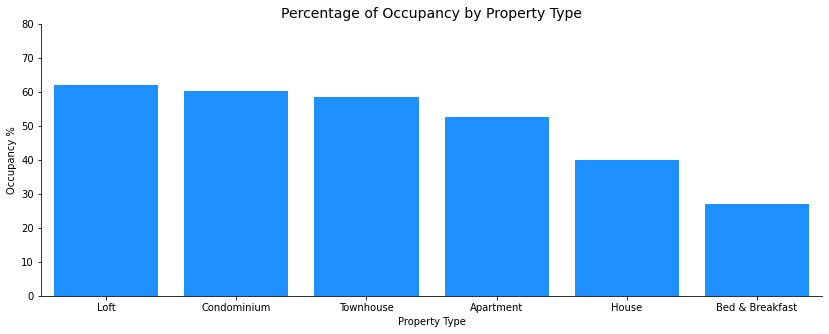

In [49]:
# plot the above to take a look visually
fig, axis = plt.subplots(figsize=(14, 5))

g = sns.barplot(data=property_type_avl, x='property_type', y='% busy', ax=axis, facecolor='#1E90FF')
_ = g.set_title('Percentage of Occupancy by Property Type', fontsize=14)
_ = g.set_ylabel('Occupancy %')
_ = g.set_xlabel('Property Type')

sns.despine()

plt.ylim(0, 80);

# g.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), ncol=1)

### Is it possible to predict the price of a listing based on its features, like number of rooms, beds, bathrooms, etc.?

In [51]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [52]:
listings.shape

(3582, 95)

In [124]:
# Use the following columns to work on the prediction
columns = [
        'latitude', 'longitude',
        'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',
       'price', 'number_of_reviews',
        'review_scores_rating',
       'review_scores_location', 'review_scores_value'
       ]

In [125]:
listings[columns].head(2)

latitude  longitude property_type        room_type  accommodates  \
0     42.28     -71.13         House  Entire home/apt             4   
1     42.29     -71.13     Apartment     Private room             2   

   bathrooms  bedrooms  beds  bed_type  \
0       1.50      2.00  3.00  Real Bed   
1       1.00      1.00  1.00  Real Bed   

                                           amenities  price  \
0  {TV,"Wireless Internet",Kitchen,"Free Parking ... 250.00   
1  {TV,Internet,"Wireless Internet","Air Conditio...  65.00   

   number_of_reviews  review_scores_rating  review_scores_location  \
0                  0                  0.00                    0.00   
1                 36                 94.00                    9.00   

   review_scores_value  
0                 0.00  
1                 9.00

In [126]:
listings[columns].isna().sum()

latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
bed_type                  0
amenities                 0
price                     0
number_of_reviews         0
review_scores_rating      0
review_scores_location    0
review_scores_value       0
dtype: int64

In [56]:
listings['review_scores_rating'].fillna(0, inplace=True)
listings['review_scores_location'].fillna(0, inplace=True)
listings['review_scores_value'].fillna(0, inplace=True)

In [57]:
for i, r in tqdm(listings.iterrows(), total=listings.shape[0]):
    a = r['amenities'].split(',')
    for item in a:
        item = item.replace('"', '').replace("{","").replace("}","")
        if item not in listings.columns:
            listings[item] = None
            listings.at[i, item] = 1
        else:
            listings.at[i, item] = 1

    

100%|██████████| 3582/3582 [00:00<00:00, 3695.58it/s]


In [58]:
listings.head(1)

id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   

  last_scraped                        name  \
0   2016-09-07  Sunny Bungalow in the City   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   

                                               space  \
0  The house has an open and cozy feel at the sam...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   

                               neighborhood_overview notes  \
0  Roslindale is quiet, convenient and friendly. ...   NaN   

                                             transit  \
0  The bus stop is 2 blocks away, and frequent. B...   

                                              access interaction  \
0  You will have access to 2 bedrooms, a living r...         NaN   

                                         house_rules  \
0  Clean up and treat the home the way you'd like...   

                                       thumbnail_url  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...   

                                          medium_url  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...   

                                         picture_url  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...   

                                      xl_picture_url   host_id  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...  31303940   

                                     host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/31303940  Virginia  2015-04-15   

                          host_location  \
0  Boston, Massachusetts, United States   

                                          host_about host_response_time  \
0  We are country and city connecting in our deck...                NaN   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                NaN                  NaN                 f   

                                  host_thumbnail_url  \
0  https://a2.muscache.com/im/pictures/5936fef0-b...   

                                    host_picture_url host_neighbourhood  \
0  https://a2.muscache.com/im/pictures/5936fef0-b...         Roslindale   

   host_listings_count  host_total_listings_count  \
0                    1                          1   

                          host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'facebook', 'reviews']                    t   

  host_identity_verified                                         street  \
0                      f  Birch Street, Boston, MA 02131, United States   

  neighbourhood neighbourhood_cleansed  neighbourhood_group_cleansed    city  \
0    Roslindale             Roslindale                           NaN  Boston   

  state zipcode  market smart_location country_code        country  latitude  \
0    MA   02131  Boston     Boston, MA           US  United States     42.28   

   longitude is_location_exact property_type        room_type  accommodates  \
0     -71.13                 t         House  Entire home/apt             4   

   bathrooms  bedrooms  beds  bed_type  \
0       1.50      2.00  3.00  Real Bed   

                                           amenities  square_feet  price  \
0  {TV,"Wireless Internet",Kitchen,"Free Parking ...          NaN 250.00   

  weekly_price monthly_price security_deposit cleaning_fee  guests_included  \
0          NaN           NaN              NaN       $35.00                1   

  extra_people  minimum_nights  maximum_nights calendar_updated  \
0        $0.00               2            1125      2 weeks ago   

   has_availability  availability_30  availability_60  availability_90  \
0               NaN                0                0                0   

   availability_365 calendar_last_scraped  number_of_reviews first_review  \
0                 0         

In [127]:
# add the new columns extracted from amenities
columns += list(listings.columns[95:])
columns

['latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_location',
 'review_scores_value',
 'TV',
 'Wireless Internet',
 'Kitchen',
 'Free Parking on Premises',
 'Pets live on this property',
 'Dog(s)',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer',
 'Smoke Detector',
 'Fire Extinguisher',
 'Essentials',
 'Shampoo',
 'Laptop Friendly Workspace',
 'Internet',
 'Air Conditioning',
 'Pets Allowed',
 'Carbon Monoxide Detector',
 'Lock on Bedroom Door',
 'Hangers',
 'Hair Dryer',
 'Iron',
 'Cable TV',
 'First Aid Kit',
 'Safety Card',
 'translation missing: en.hosting_amenity_49',
 'translation missing: en.hosting_amenity_50',
 'Gym',
 'Breakfast',
 'Indoor Fireplace',
 'Cat(s)',
 '24-Hour Check-in',
 'Hot Tub',
 'Buzzer/Wireless Intercom',
 'Other pet(s)',
 'Washer / Dryer',
 'Smoking Allowed',
 '',
 'Suitable for Events',
 'W

In [128]:
# remove some no longer needed columns
columns.remove('')
columns.remove('amenities')

In [129]:
listings[columns].head(1)

latitude  longitude property_type        room_type  accommodates  \
0     42.28     -71.13         House  Entire home/apt             4   

   bathrooms  bedrooms  beds  bed_type  price  number_of_reviews  \
0       1.50      2.00  3.00  Real Bed 250.00                  0   

   review_scores_rating  review_scores_location  review_scores_value  TV  \
0                  0.00                    0.00                 0.00   1   

   Wireless Internet  Kitchen  Free Parking on Premises  \
0                  1        1                         1   

   Pets live on this property  Dog(s)  Heating  Family/Kid Friendly  Washer  \
0                           1       1        1                    1       1   

   Dryer  Smoke Detector  Fire Extinguisher  Essentials  Shampoo  \
0      1               1                  1           1        1   

   Laptop Friendly Workspace  Internet  Air Conditioning  Pets Allowed  \
0                          1         0                 0             0   

   Carbon Monoxide Detector  Lock on Bedroom Door  Hangers  Hair Dryer  Iron  \
0                         0                     0        0           0     0   

   Cable TV  First Aid Kit  Safety Card  \
0         0              0            0   

   translation missing: en.hosting_amenity_49  \
0                                           0   

   translation missing: en.hosting_amenity_50  Gym  Breakfast  \
0                                           0    0          0   

   Indoor Fireplace  Cat(s)  24-Hour Check-in  Hot Tub  \
0                 0       0                 0        0   

   Buzzer/Wireless Intercom  Other pet(s)  Washer / Dryer  Smoking Allowed  \
0                         0             0               0                0   

   Suitable for Events  Wheelchair Accessible  Elevator in Building  Pool  \
0                    0                      0                     0     0   

   Doorman  Paid Parking Off Premises  Free Parking on Street  
0        0                          0                       0

In [130]:
# replace all null values of the new columns with zero
for col in columns[14:]:
    listings[col].fillna(0, inplace=True)

In [134]:
# identify categorical columns
catcols = listings[columns].select_dtypes(include=['object']).copy()
catcols.head()

property_type        room_type  bed_type
0         House  Entire home/apt  Real Bed
1     Apartment     Private room  Real Bed
2     Apartment     Private room  Real Bed
3         House     Private room  Real Bed
4         House     Private room  Real Bed

In [135]:
catcols_name = catcols.columns
for col in catcols_name:
    catcols = pd.concat([catcols.drop(col, axis=1), pd.get_dummies(
        catcols[col],
        prefix=col,
        prefix_sep='_',
        drop_first=True,
        dummy_na=False
    )], axis=1)

In [136]:
catcols.head()

property_type_Bed & Breakfast  property_type_Boat  property_type_Camper/RV  \
0                              0                   0                        0   
1                              0                   0                        0   
2                              0                   0                        0   
3                              0                   0                        0   
4                              0                   0                        0   

   property_type_Condominium  property_type_Dorm  property_type_Entire Floor  \
0                          0                   0                           0   
1                          0                   0                           0   
2                          0                   0                           0   
3                          0                   0                           0   
4                          0                   0                           0   

   property_type_Guesthouse  property_type_House  property_type_Loft  \
0                         0                    1                   0   
1                         0                    0                   0   
2                         0                    0                   0   
3                         0                    1                   0   
4                         0                    1                   0   

   property_type_Other  property_type_Townhouse  property_type_Villa  \
0                    0                        0                    0   
1                    0                        0                    0   
2                    0                        0                    0   
3                    0                        0                    0   
4                    0                        0                    0   

   room_type_Private room  room_type_Shared room  bed_type_Couch  \
0                       0                      0               0   
1                       1                      0               0   
2                       1                      0               0   
3                       1                      0               0   
4                       1                      0               0   

   bed_type_Futon  bed_type_Pull-out Sofa  bed_type_Real Bed  
0               0                       0                  1  
1               0                       0                  1  
2               0                       0                  1  
3               0                       0                  1  
4               0                       0                  1

In [141]:
# remove categorical column names from columns
for col in catcols_name:
    columns.remove(col)

# add dummy categorical column names

columns += list(catcols.columns)

columns

['latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_location',
 'review_scores_value',
 'TV',
 'Wireless Internet',
 'Kitchen',
 'Free Parking on Premises',
 'Pets live on this property',
 'Dog(s)',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer',
 'Smoke Detector',
 'Fire Extinguisher',
 'Essentials',
 'Shampoo',
 'Laptop Friendly Workspace',
 'Internet',
 'Air Conditioning',
 'Pets Allowed',
 'Carbon Monoxide Detector',
 'Lock on Bedroom Door',
 'Hangers',
 'Hair Dryer',
 'Iron',
 'Cable TV',
 'First Aid Kit',
 'Safety Card',
 'translation missing: en.hosting_amenity_49',
 'translation missing: en.hosting_amenity_50',
 'Gym',
 'Breakfast',
 'Indoor Fireplace',
 'Cat(s)',
 '24-Hour Check-in',
 'Hot Tub',
 'Buzzer/Wireless Intercom',
 'Other pet(s)',
 'Washer / Dryer',
 'Smoking Allowed',
 'Suitable for Events',
 'Wheelchair Accessible',
 'Elevator in Building',
 'Pool',
 'Doorm

In [143]:
# merge dummy columns to listings
listings = pd.concat([listings, catcols], axis=1)

In [144]:
listings[columns].head()

latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
0     42.28     -71.13             4       1.50      2.00  3.00 250.00   
1     42.29     -71.13             2       1.00      1.00  1.00  65.00   
2     42.29     -71.14             2       1.00      1.00  1.00  65.00   
3     42.28     -71.12             4       1.00      1.00  2.00  75.00   
4     42.28     -71.14             2       1.50      1.00  2.00  79.00   

   number_of_reviews  review_scores_rating  review_scores_location  \
0                  0                  0.00                    0.00   
1                 36                 94.00                    9.00   
2                 41                 98.00                    9.00   
3                  1                100.00                   10.00   
4                 29                 99.00                    9.00   

   review_scores_value  TV  Wireless Internet  Kitchen  \
0                 0.00   1                  1        1   
1                 9.00   1                  1        1   
2                10.00   1                  1        1   
3                10.00   1                  1        1   
4                10.00   0                  1        1   

   Free Parking on Premises  Pets live on this property  Dog(s)  Heating  \
0                         1                           1       1        1   
1                         0                           1       1        1   
2                         1                           0       0        1   
3                         1                           0       0        1   
4                         0                           0       0        1   

   Family/Kid Friendly  Washer  Dryer  Smoke Detector  Fire Extinguisher  \
0                    1       1      1               1                  1   
1                    1       1      1               1                  1   
2                    0       1      1               1                  0   
3                    0       1      1               1                  1   
4                    0       0      0               1                  0   

   Essentials  Shampoo  Laptop Friendly Workspace  Internet  Air Conditioning  \
0           1        1                          1         0                 0   
1           1        1                          0         1                 1   
2           1        1                          0         0                 1   
3           1        1                          1         1                 1   
4           1        1                          0         1                 1   

   Pets Allowed  Carbon Monoxide Detector  Lock on Bedroom Door  Hangers  \
0             0                         0                     0        0   
1             1                         1                     1        1   
2             0                         1                     1        0   
3             0                         1                     0        1   
4             0                         1                     0        1   

   Hair Dryer  Iron  Cable TV  First Aid Kit  Safety Card  \
0           0     0         0              0            0   
1           1     1         0              0            0   
2           0     0         1              1            1   
3           1     1         0              1            1   
4           1     1         0              1            0   

   translation missing: en.hosting_amenity_49  \
0                                           0   
1                                           0   
2                                           1   
3                                           0   
4                                           0   

   translation missing: en.hosting_amenity_50  Gym  Breakfast  \
0                                           0    0          0   
1                                           0    0          0   
2                                           1    0          0   
3       

In [149]:
# remove those columns that do not have positive or negative correlation with price
corr = listings[columns].corr().sort_values('price', ascending=False)['price']

corr[corr<0]
# corrpositive = list(corr[corr>0.05].index)
# corrnegative = list(corr[corr<-0.03].index)

# columns = corrpositive + corrnegative
# columns

Carbon Monoxide Detector                     -0.00
property_type_Entire Floor                   -0.01
Free Parking on Street                       -0.01
property_type_Camper/RV                      -0.01
Safety Card                                  -0.02
property_type_Dorm                           -0.02
Smoke Detector                               -0.02
property_type_Townhouse                      -0.02
Other pet(s)                                 -0.02
bed_type_Couch                               -0.03
property_type_Bed & Breakfast                -0.03
bed_type_Pull-out Sofa                       -0.05
Hot Tub                                      -0.05
Cat(s)                                       -0.05
Pets live on this property                   -0.06
First Aid Kit                                -0.06
review_scores_location                       -0.06
Breakfast                                    -0.06
Smoking Allowed                              -0.07
bed_type_Futon                 

<AxesSubplot:>

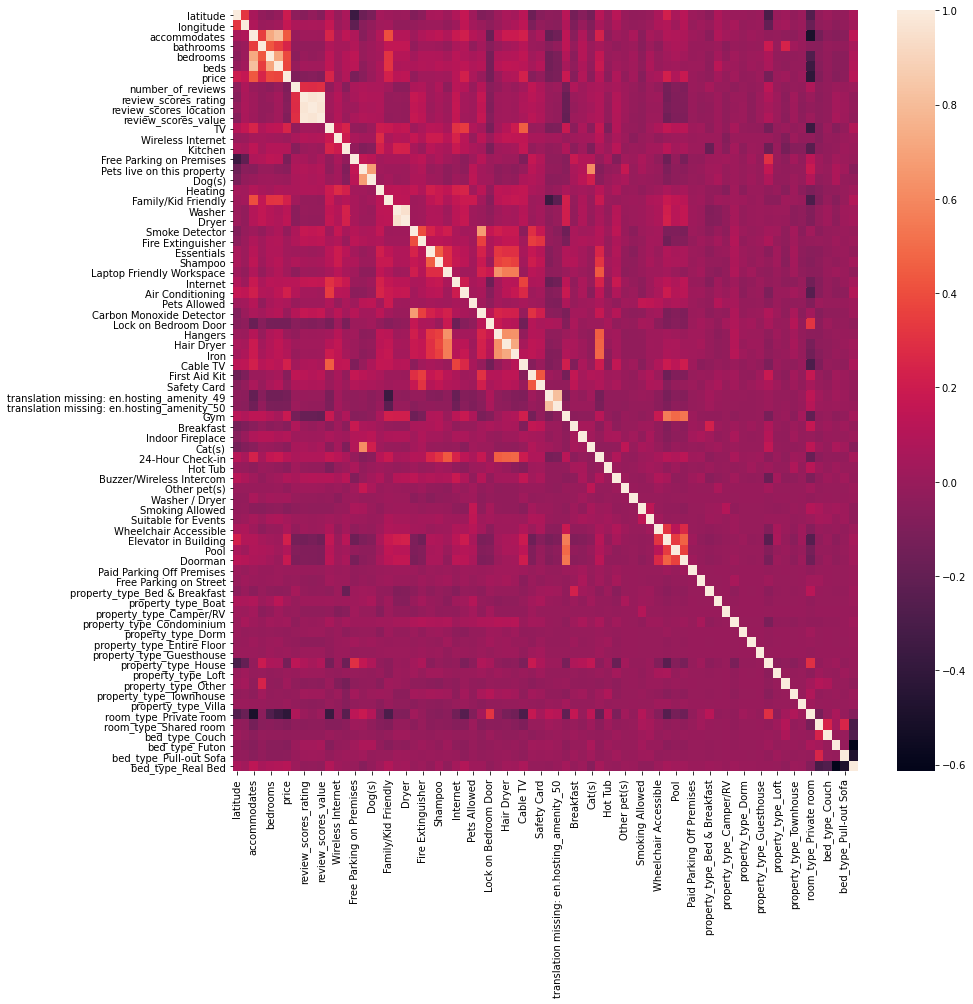

In [153]:
fig, ax = plt.subplots(figsize=(14,14))
corr = listings[columns].corr()
mask = np.tri(*corr.shape).T
sns.heatmap(listings[columns].corr(), ax=ax, mask=mask)

In [162]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [151]:
scaler = MinMaxScaler()
scaler.fit(listings[['longitude']])
listings['longitude'] = scaler.transform(listings[['longitude']])
# listings[['longitude', 'longitude_scaled']].head()

In [152]:
scaler = MinMaxScaler()
scaler.fit(listings[['latitude']])
listings['latitude'] = scaler.transform(listings[['latitude']])
# listings[['latitude', 'latitude_scaled']].head()

In [154]:
x = listings[columns]
y = listings['price']

x = x.drop('price', axis='columns')


In [156]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=42)

In [159]:
lm_model = LinearRegression(normalize=True)

In [160]:
lm_model.fit(x_train, y_train)

LinearRegression(normalize=True)

In [161]:
y_test_pred = lm_model.predict(x_test)

In [163]:
r2_score(y_test, y_test_pred)

0.25021761155741873